<a href="https://colab.research.google.com/github/Kbcity1/checkpoint/blob/master/classwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# show the distribution of all numerical variables in the data set
# show the distribution of all four categorical variables
# what segment makes the most sales
# what city sells the most consumer product
# what is the total quantity ordered for all consumer and corporate products by each state
# what is the total sales made on chairs in each state
# is there a relationship between sales and profit
# in what city do this company have most orders
# what product category is most ordered in this city
# show the distribution of shipping mode for each product category

In [2]:
super = pd.read_csv('/content/superstore_train.csv')
super.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


<function matplotlib.pyplot.show(close=None, block=None)>

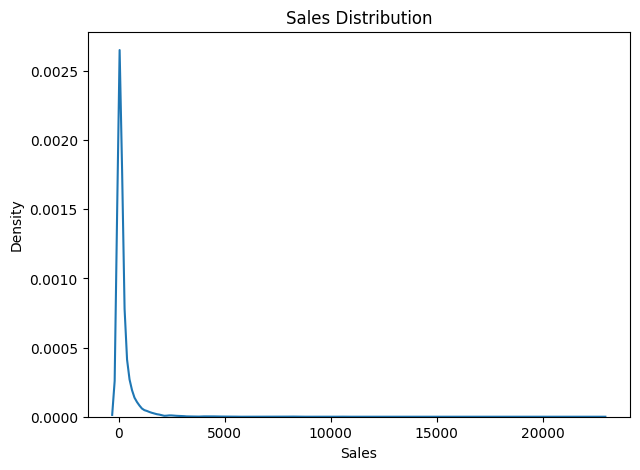

In [4]:
# show the distribution of all numerical variables in the data set
plt.figure(figsize=(7,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.kdeplot(data= super, x= 'Sales', palette= "tab10")
plt.title('Sales Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

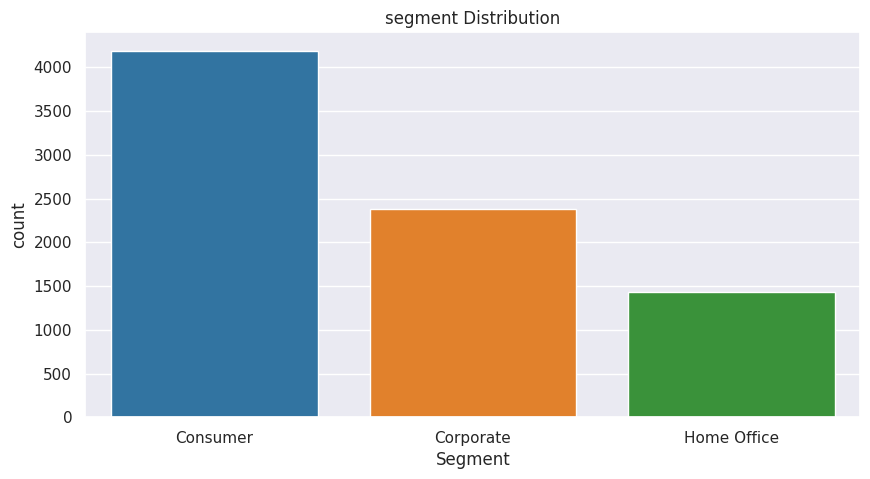

In [5]:
plt.figure(figsize=(10,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
sns.countplot(data= super, x= 'Segment', palette= "tab10")
plt.title('segment Distribution')
plt.show

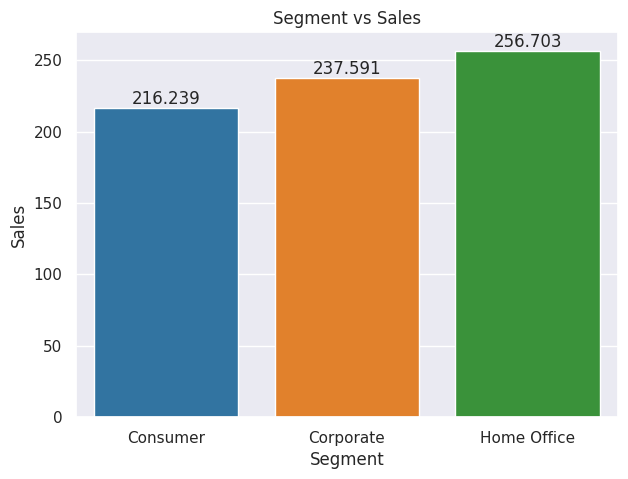

In [9]:
plt.figure(figsize=(7,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
fig = sns.barplot(data= super, x= 'Segment', y= 'Sales', ci = None, estimator = 'mean', palette= "tab10")
plt.title('Segment vs Sales')
plt.show

for i in fig.containers:
    fig.bar_label(i)
plt.show()

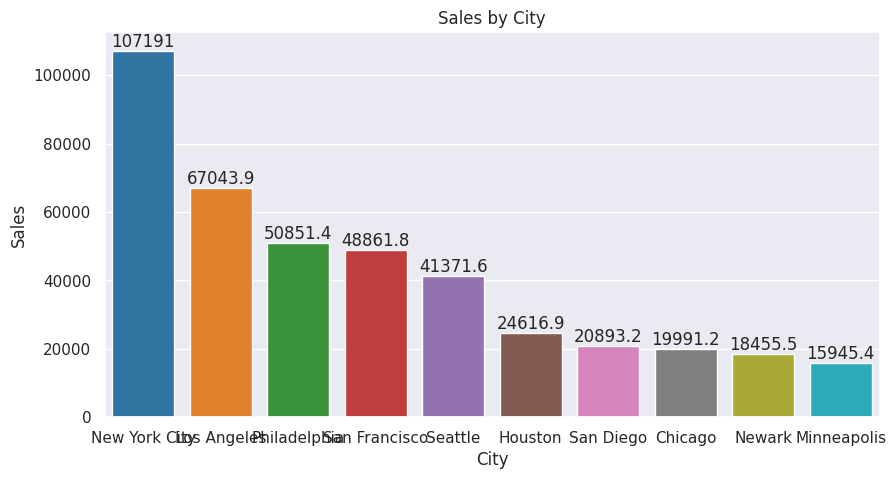

In [15]:
#what city sells the most consumer product
kay = super.loc[super['Segment'] == 'Consumer']
kay = kay.groupby('City')[['Sales']].sum().sort_values(by = 'Sales', ascending= False)
kay = kay.head(10)

plt.figure(figsize=(10,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
fig = sns.barplot(data= kay, x= kay.index, y= 'Sales', ci = None, estimator = 'mean', palette= "tab10")
plt.title('Sales by City')

for i in fig.containers:
    fig.bar_label(i)
plt.show()

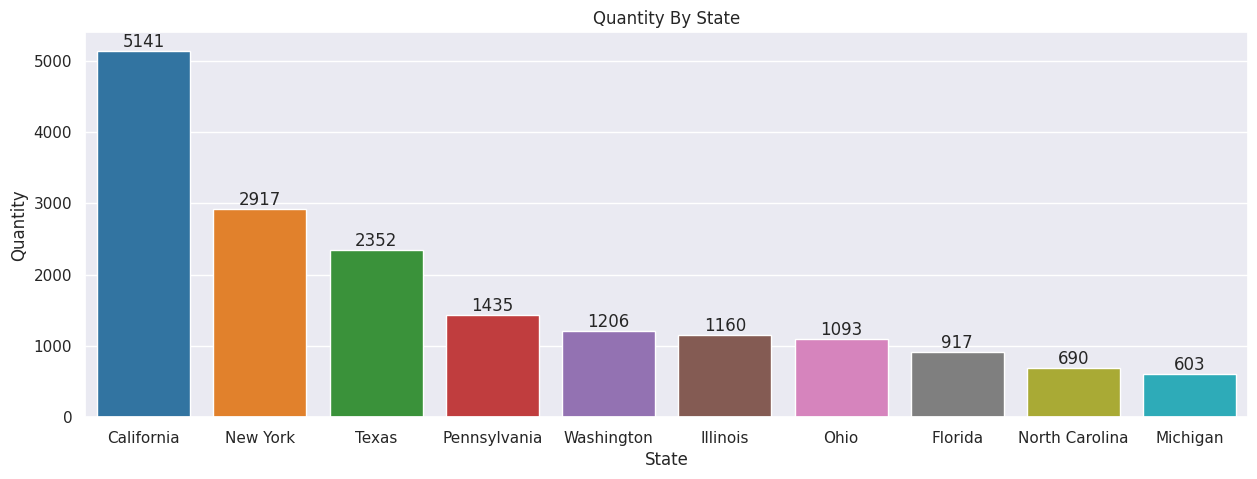

In [20]:
# what is the total quantity ordered for all consumer and corporate products by each state
kay = super.loc[(super['Segment'] == 'Consumer') | (super['Segment'] == 'Corporate')]
kay = kay.groupby('State')[['Quantity']].sum().sort_values(by = 'Quantity', ascending= False)
kay = kay.head(10)

plt.figure(figsize=(15,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
fig = sns.barplot(data= kay, x= kay.index, y= 'Quantity', ci = None, palette= "tab10")
plt.title('Quantity By State')

for i in fig.containers:
    fig.bar_label(i)
plt.show()

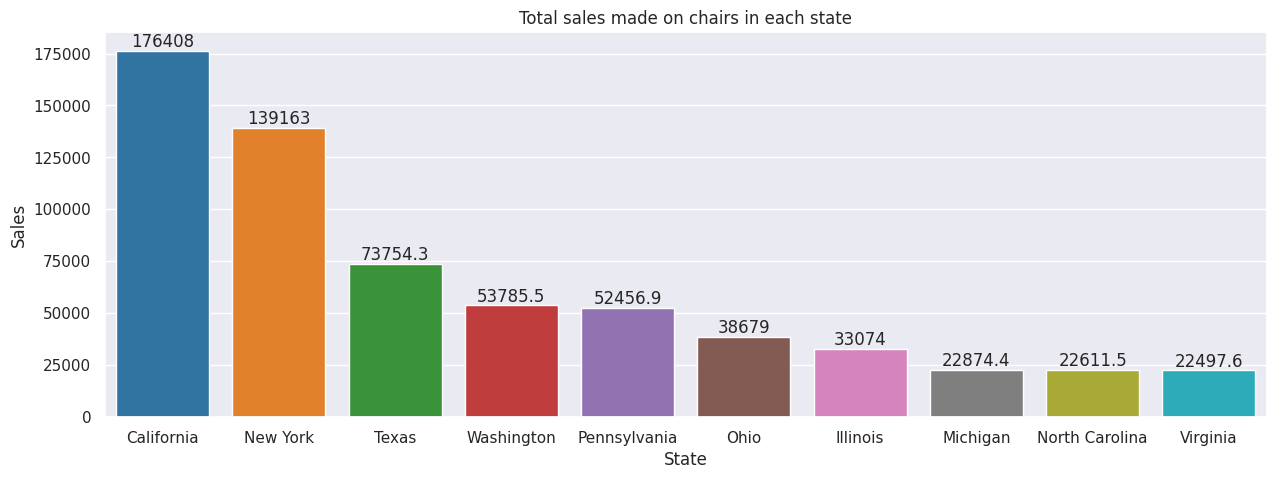

In [22]:
# what is the total sales made on chairs in each state
kay = super.loc[super['Segment'] == 'Consumer']
kay = kay.groupby('State')[['Sales']].sum().sort_values(by = 'Sales', ascending= False)
kay = kay.head(10)

plt.figure(figsize=(15,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
fig = sns.barplot(data= kay, x= 'State', y= 'Sales', ci = None, estimator = 'mean', palette= "tab10")
plt.title('Total sales made on chairs in each state')

for i in fig.containers:
    fig.bar_label(i)
plt.show()

Text(0.5, 1.0, 'Relationship between Sales and Profit is 41.48%')

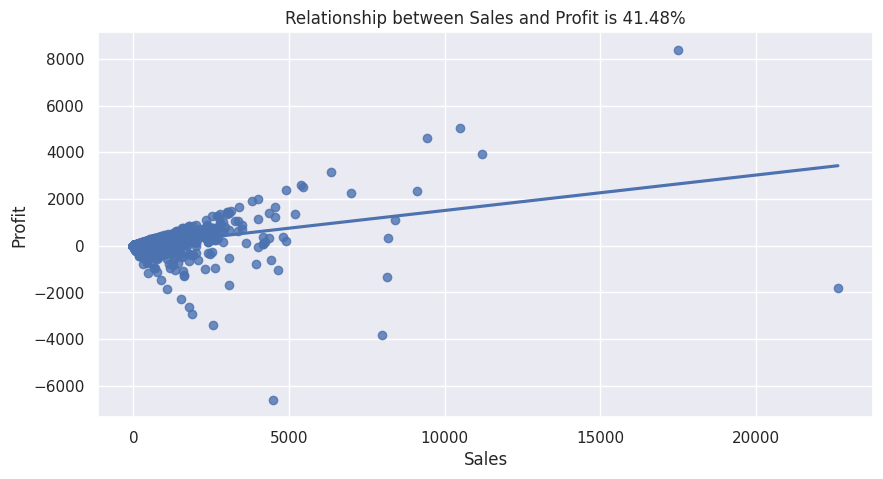

In [28]:
# is there a relationship between sales and profit

plt.figure(figsize=(10,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
sns.regplot(data= super, x= 'Sales', y= 'Profit', ci = None)
plt.title(f"Relationship between Sales and Profit is {(super.Sales.corr(super.Profit) * 100).round(2)}%")


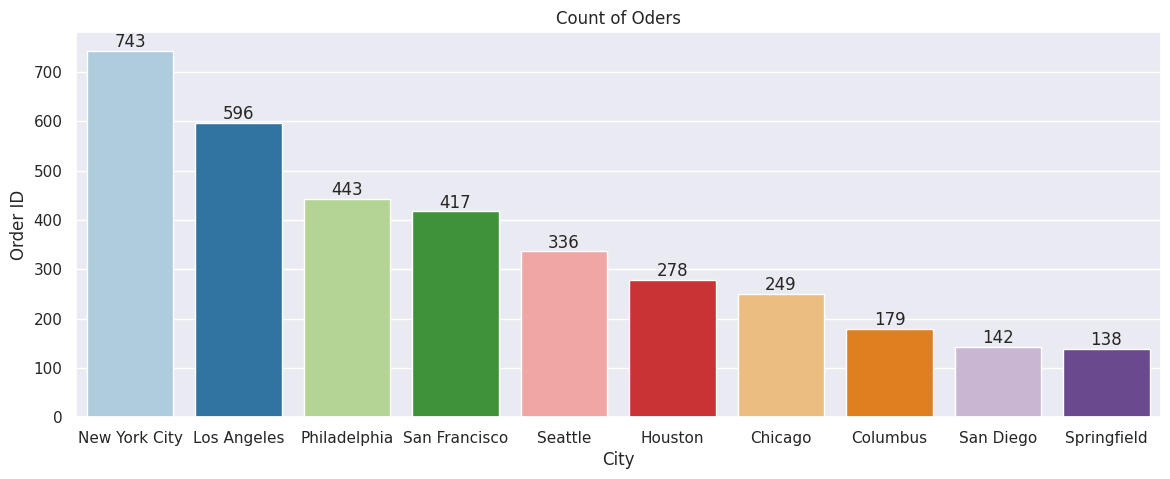

In [32]:
# in what city do this company have most orders
kay = super.groupby('City')[['Order ID']].count().sort_values(by = 'Order ID', ascending= False)
kay = kay.head(10)

plt.figure(figsize=(14,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
fig = sns.barplot(data= kay, x= kay.index, y= 'Order ID', errorbar= None, palette= "Paired")
plt.title('Count of Oders')

for i in fig.containers:
    fig.bar_label(i)
plt.show()

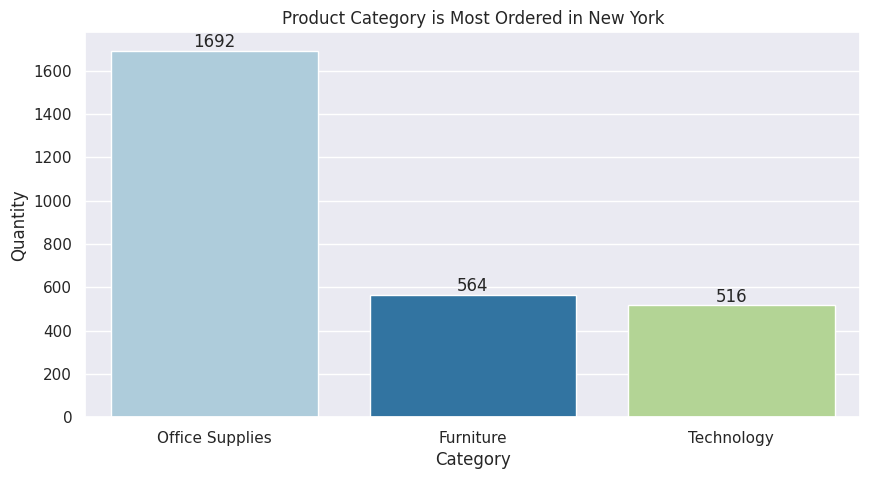

In [39]:
# what product category is most ordered in this city
kay = super.loc[super['City'] == 'New York City']
kay = kay.groupby('Category')[['Quantity']].sum().sort_values(by = 'Quantity', ascending= False)
plt.figure(figsize=(10,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
fig = sns.barplot(data= kay, x= kay.index, y= 'Quantity', ci = None, palette= "Paired")
plt.title('Product Category is Most Ordered in New York')

for i in fig.containers:
    fig.bar_label(i)
plt.show()

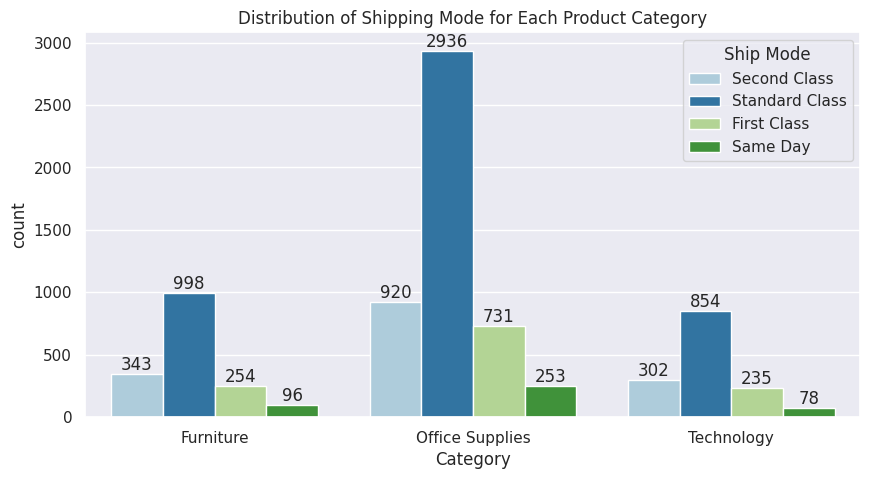

In [41]:
# show the distribution of shipping mode for each product category
plt.figure(figsize=(10,5)) #To adjust the size of the chart. 5(x=width), 5(y=width)
sns.set(style= 'darkgrid')
fig = sns.countplot(data= super, x= 'Category', hue= 'Ship Mode', palette= "Paired")
plt.title('Distribution of Shipping Mode for Each Product Category')

for i in fig.containers:
    fig.bar_label(i)
plt.show()